### 75.06/95.58 Organización de Datos: Trabajo Práctico 1 ###
#### Primer Cuatrimestre de 2020 ####



In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

tweets = pd.read_csv('train.csv') 
tweets.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [262]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [263]:
#Hay tweets repetidos, eliminar?
tweets['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [264]:
tweets['location'].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [265]:
tweets['keyword'].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [266]:
duplicados = tweets.duplicated(subset = 'text', keep = False)
duplicados.value_counts()

False    7434
True      179
dtype: int64

In [267]:
tweets.drop_duplicates(subset = 'text', keep = False, inplace = True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 7612
Data columns (total 5 columns):
id          7434 non-null int64
keyword     7378 non-null object
location    4982 non-null object
text        7434 non-null object
target      7434 non-null int64
dtypes: int64(2), object(3)
memory usage: 348.5+ KB


### Cantidad de reales vs falsos

In [268]:
tweets['target'].value_counts(normalize=True)

0    0.576271
1    0.423729
Name: target, dtype: float64

### Top ciudades mentirosas/dicen la verdad

In [269]:
#No me importan las locaciones NAN
partial = tweets.dropna()

In [270]:
partial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 31 to 7581
Data columns (total 5 columns):
id          4982 non-null int64
keyword     4982 non-null object
location    4982 non-null object
text        4982 non-null object
target      4982 non-null int64
dtypes: int64(2), object(3)
memory usage: 233.5+ KB


In [278]:
partial.loc[:, 'location'] = locations.location.str.lower()

/Users/Matias/miniconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [279]:
locations = partial[partial['location'].str.match(r'^([a-zA-Z,\s])*$') > 0]
locations.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
33,50,ablaze,africa,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"philadelphia, pa",Crying out for more! Set me ablaze,0
35,53,ablaze,"london, uk",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,pretoria,@PhDSquares #mufc they've built so much hype a...,0


In [280]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 31 to 7581
Data columns (total 5 columns):
id          3946 non-null int64
keyword     3946 non-null object
location    3946 non-null object
text        3946 non-null object
target      3946 non-null int64
dtypes: int64(2), object(3)
memory usage: 185.0+ KB


In [281]:
locations.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
33,50,ablaze,africa,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"philadelphia, pa",Crying out for more! Set me ablaze,0
35,53,ablaze,"london, uk",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,pretoria,@PhDSquares #mufc they've built so much hype a...,0


In [282]:
#10 lugares con mas tweets
top_10_locations = locations['location'].value_counts().nlargest(20).to_frame()
top_10_locations

,location
usa,104
new york,75
united states,50
london,49
canada,33
uk,29
worldwide,29
"los angeles, ca",28
nigeria,25
india,24


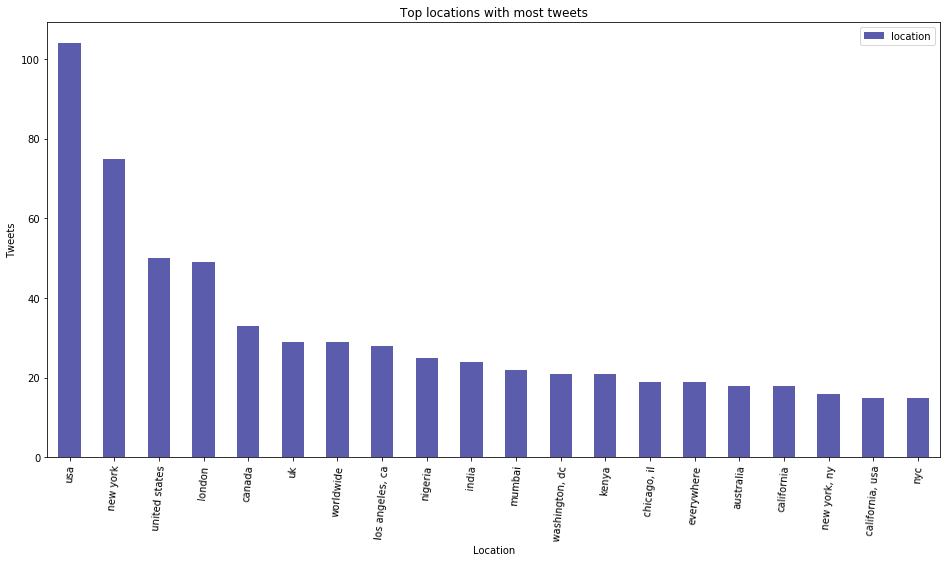

In [283]:
top_10_locations.plot(kind='bar',  rot=85, title='Top locations with most tweets', color=(0.2, 0.2, 0.6, 0.8), figsize=(16, 8))
ax = plt.gca()
ax.set_ylabel('Tweets')
ax.set_xlabel('Location')

In [284]:
locations.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
33,50,ablaze,africa,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"philadelphia, pa",Crying out for more! Set me ablaze,0
35,53,ablaze,"london, uk",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,pretoria,@PhDSquares #mufc they've built so much hype a...,0


In [288]:
by_location = locations.groupby(['location']).agg({'target':['count', 'sum']})
level_0 = by_location.columns.get_level_values(0)
level_1 = by_location.columns.get_level_values(1)
by_location.columns = level_0 + '_' + level_1
by_location.reset_index(inplace=True)
by_location.head()

,location,target_count,target_sum
0,,1,1
1,glasgow,1,0
2,"melbourne, australia",1,0
3,news,1,1
4,alberta,1,1


In [289]:
by_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 3 columns):
location        2271 non-null object
target_count    2271 non-null int64
target_sum      2271 non-null int64
dtypes: int64(2), object(1)
memory usage: 53.4+ KB


In [290]:
import os.path
if(not os.path.isfile('locations.csv')):
    get_geodata()

def get_geodata():
    from geopy.geocoders import Nominatim
    from tqdm import tqdm
    from geopy.extra.rate_limiter import RateLimiter
    geolocator = Nominatim(user_agent="mile.marchese@gmail.com")
    tqdm.pandas()
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2, max_retries=0)
    by_location['geodata'] = by_location['location'].progress_apply(geocode)
    by_location['address'] = by_location['geodata'].apply(lambda loc: loc.address if loc else None)
    by_location['point'] = by_location['geodata'].apply(lambda loc: tuple(loc.point) if loc else None)
    by_location.to_csv('locations.csv', index=False)

In [294]:
address = pd.read_csv('locations.csv', usecols=['location', 'target_count', 'target_sum', 'address']) 
address.head()

,location,target_count,target_sum,address
0,,1,1,NaN
1,glasgow,1,0,"Glasgow, Glasgow City, Scotland, G2 9SA, Unite..."
2,"melbourne, australia",1,0,"City of Melbourne, Victoria, Australia"
3,news,1,1,"34375, Abbotsford Centre, Abbotsford, Fraser V..."
4,alberta,1,1,"Alberta, Canada"


In [295]:
#Hay 374 que geopy no encontró
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 4 columns):
location        2271 non-null object
target_count    2271 non-null int64
target_sum      2271 non-null int64
address         1880 non-null object
dtypes: int64(2), object(2)
memory usage: 71.1+ KB


In [296]:
#Se puede correr de nuevo geopy 
not_found_addr = address[address['address'].isnull()]
not_found_addr.head()

,location,target_count,target_sum,address
0,,1,1,NaN
8,indiana,1,0,NaN
9,jariana town,1,0,NaN
12,"nevada carson city,freeman st",1,1,NaN
16,nxgerxa,1,0,NaN


In [301]:
not_found_addr['target_count'].value_counts(normalize=True)

1    0.941176
2    0.038363
3    0.015345
6    0.002558
4    0.002558
Name: target_count, dtype: float64

In [302]:
address['address'].describe()

count                                   1880
unique                                  1430
top       New York, United States of America
freq                                      15
Name: address, dtype: object

In [303]:
by_address = address.groupby(['address']).agg({'target_count':'sum', 'target_sum': 'sum'\
                                               , 'location': lambda x: "%s" % '-'.join(set(x))}).reset_index()
by_address.head()

,address,target_count,target_sum,location
0,"(B-40);Terrassa nord;Matadepera, Autopista Bar...",1,0,prov
1,"1, Route Y, Lede, Ripley County, Missouri, 639...",1,1,im in route
2,"1, South Rent Car Road, East Haven, Houston, H...",1,1,in the shadows
3,"188, Շահումյան փողոց, Գյումրի, Շիրակի մարզ, 31...",1,0,a sofa
4,"2551, Woodcreek Oaks Boulevard, Roseville, Pla...",1,0,"woodcreek hs, roseville, ca"


In [304]:
by_address.columns = ['address', 'total', 'real', 'location_list']

In [305]:
by_address['fake'] = by_address['total'] - by_address['real']
by_address.head()

,address,total,real,location_list,fake
0,"(B-40);Terrassa nord;Matadepera, Autopista Bar...",1,0,prov,1
1,"1, Route Y, Lede, Ripley County, Missouri, 639...",1,1,im in route,0
2,"1, South Rent Car Road, East Haven, Houston, H...",1,1,in the shadows,0
3,"188, Շահումյան փողոց, Գյումրի, Շիրակի մարզ, 31...",1,0,a sofa,1
4,"2551, Woodcreek Oaks Boulevard, Roseville, Pla...",1,0,"woodcreek hs, roseville, ca",1


In [306]:
by_address.describe()

,total,real,fake
count,1430.000000,1430.000000,1430.000000
mean,2.461538,1.100699,1.360839
std,7.133800,3.632477,3.987893
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000
max,168.000000,103.000000,98.000000


In [307]:
#10 ciudades que mas reales tienen
most_real = by_address.nlargest(10, 'real').loc[:, ['address', 'real']].set_index('address')
most_real

,real
address,
United States,103
"New York, United States of America",40
"London, Greater London, England, SW1A 2DX, United Kingdom",26
"Mumbai, Mumbai City, Maharashtra, India",22
Nigeria,22
United Kingdom,20
"Washington, District of Columbia, 20500, United States of America",19
भारत - India,19
"Calgary, Alberta, Canada",18


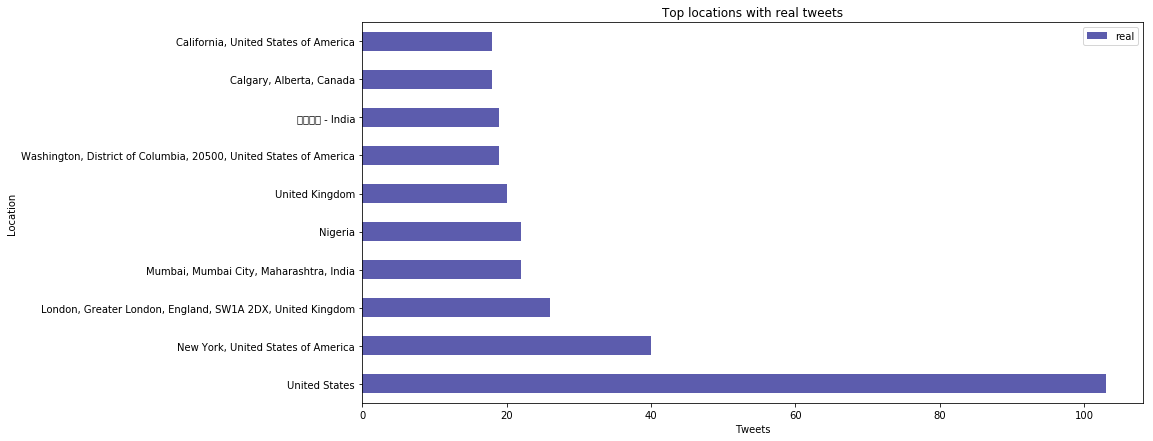

In [308]:
most_real.plot(kind='barh',  rot=0, title='Top locations with real tweets', color=(0.2, 0.2, 0.6, 0.8), figsize=(14, 7))
ax = plt.gca()
ax.set_xlabel('Tweets')
ax.set_ylabel('Location')

In [31]:
#10 ciudades que mas falsos tienen
most_fake = by_address.nlargest(10, 'fake').loc[:,['address', 'fake']].set_index('address')
most_fake

,fake
address,
"New York, United States of America",98
United States,65
"London, Greater London, England, SW1A 2DX, United Kingdom",49
"Los Angeles, Los Angeles County, California, United States of America",32
"California, United States of America",24
United Kingdom,24
Canada,20
"Texas, United States of America",20
"Chicago, Cook County, Illinois, United States of America",19


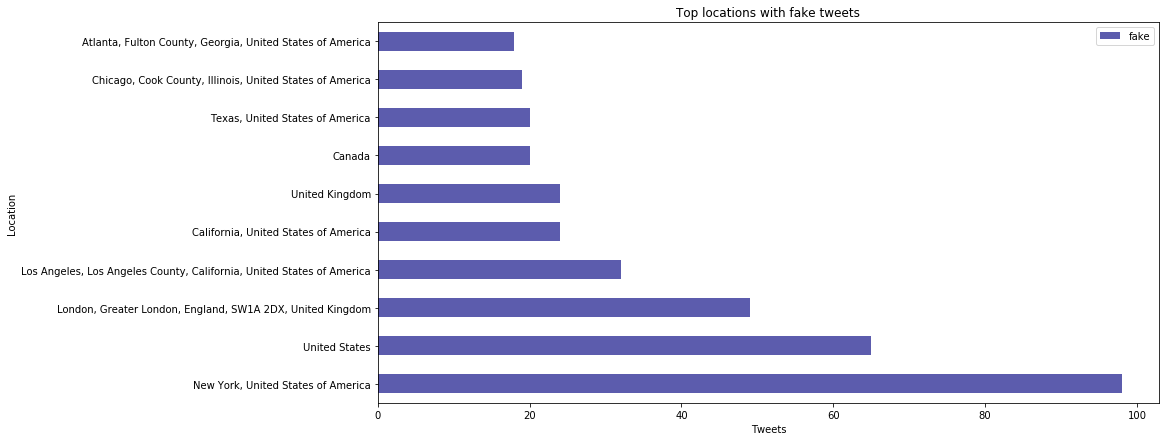

In [32]:
most_fake.plot(kind='barh',  rot=0, title='Top locations with fake tweets', color=(0.2, 0.2, 0.6, 0.8), figsize=(14, 7))
ax = plt.gca()
ax.set_xlabel('Tweets')
ax.set_ylabel('Location')

In [33]:
by_address.describe()

,total,real,fake
count,1430.000000,1430.000000,1430.000000
mean,2.461538,1.100699,1.360839
std,7.133800,3.632477,3.987893
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000
max,168.000000,103.000000,98.000000


### Top paises participantes

In [309]:
by_address['country'] = by_address['address'].str.split(pat = ",")
by_address.head()

,address,total,real,location_list,fake,country
0,"(B-40);Terrassa nord;Matadepera, Autopista Bar...",1,0,prov,1,"[(B-40);Terrassa nord;Matadepera, Autopista B..."
1,"1, Route Y, Lede, Ripley County, Missouri, 639...",1,1,im in route,0,"[1, Route Y, Lede, Ripley County, Missouri..."
2,"1, South Rent Car Road, East Haven, Houston, H...",1,1,in the shadows,0,"[1, South Rent Car Road, East Haven, Housto..."
3,"188, Շահումյան փողոց, Գյումրի, Շիրակի մարզ, 31...",1,0,a sofa,1,"[188, Շահումյան փողոց, Գյումրի, Շիրակի մարզ..."
4,"2551, Woodcreek Oaks Boulevard, Roseville, Pla...",1,0,"woodcreek hs, roseville, ca",1,"[2551, Woodcreek Oaks Boulevard, Roseville, ..."


In [310]:
by_address.loc[:, 'country'] = by_address.country.map(lambda x: x[-1])

In [311]:
by_address.head()

,address,total,real,location_list,fake,country
0,"(B-40);Terrassa nord;Matadepera, Autopista Bar...",1,0,prov,1,España
1,"1, Route Y, Lede, Ripley County, Missouri, 639...",1,1,im in route,0,United States of America
2,"1, South Rent Car Road, East Haven, Houston, H...",1,1,in the shadows,0,United States of America
3,"188, Շահումյան փողոց, Գյումրի, Շիրակի մարզ, 31...",1,0,a sofa,1,Armenia
4,"2551, Woodcreek Oaks Boulevard, Roseville, Pla...",1,0,"woodcreek hs, roseville, ca",1,United States of America


In [312]:
by_address.loc[:, 'country'] = by_address.country.str.strip()
by_country = by_address.groupby(['country']).agg({'total': 'sum', 'real': 'sum', 'fake': 'sum'}).reset_index()
by_country.head()

,country,total,real,fake
0,Africa,6,6,0
1,Antarctica,1,1,0
2,Argentina,16,9,7
3,Armenia,1,0,1
4,Asia,3,2,1


In [313]:
by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 4 columns):
country    133 non-null object
total      133 non-null int64
real       133 non-null int64
fake       133 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.3+ KB


In [314]:
by_country.nlargest(15, 'total')

,country,total,real,fake
98,United States of America,1705,700,1005
96,United Kingdom,384,143,241
15,Canada,239,114,125
97,United States,168,103,65
5,Australia,106,57,49
35,India,84,54,30
58,Nigeria,61,43,18
45,Kenya,39,15,24
66,Philippines,39,15,24
40,Italia,34,10,24


In [217]:
from geopy.geocoders import Nominatim
from tqdm import tqdm
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="mile.marchese@gmail.com")
tqdm.pandas()
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2, max_retries=0)
by_country['geodata'] = by_country['country'].progress_apply(geocode)

100%|██████████| 133/133 [06:37<00:00,  2.99s/it]


In [219]:
by_country['filtered_country'] = by_country['geodata'].apply(lambda loc: loc.address if loc else None)
by_country.to_csv('countries.csv', index=False)
by_country.head()

,country,total,real,fake,geodata,filtered_country
0,Africa,6,6,0,"(Africa, (11.5024338, 17.7578122))",Africa
1,Antarctica,1,1,0,"(Antarctica, (-79.4063075, 0.3149312))",Antarctica
2,Argentina,16,9,7,"(Argentina, (-34.9964963, -64.9672817))",Argentina
3,Armenia,1,0,1,"(Հայաստան, (40.7696272, 44.6736646))",Հայաստան
4,Asia,3,2,1,"(Asia, (51.2086975, 89.2343748))",Asia


In [228]:
by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 6 columns):
country             133 non-null object
total               133 non-null int64
real                133 non-null int64
fake                133 non-null int64
geodata             132 non-null object
filtered_country    132 non-null object
dtypes: int64(3), object(3)
memory usage: 6.4+ KB


In [229]:
#No encontro un país que tiene un solo tweet, puede ignorarse
by_country.loc[by_country['filtered_country'].isnull(), :]

,country,total,real,fake,geodata,filtered_country
61,Palestinian Territory,1,1,0,NaN,NaN


In [230]:
by_country = by_country.dropna().groupby(['filtered_country']).agg({'total':'sum', 'real':'sum', 'fake':'sum'})

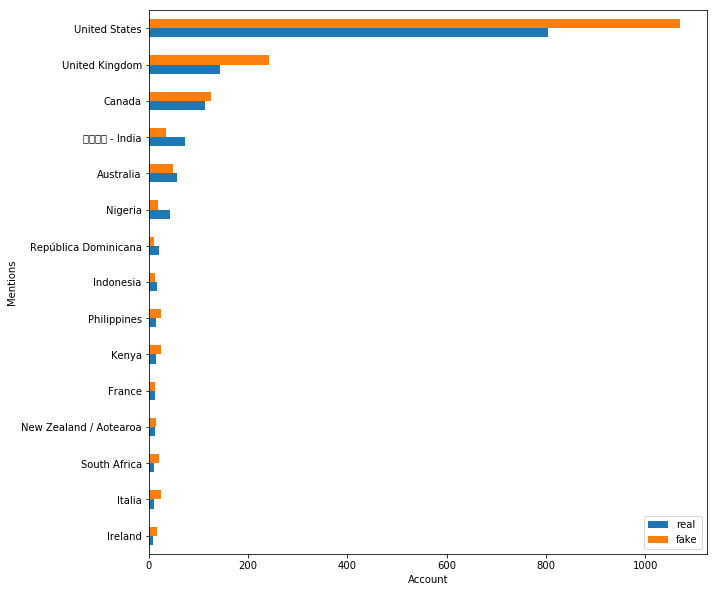

In [233]:
ax = by_country.nlargest(15, 'total').sort_values(by=['real']).loc[:, ['real', 'fake']].plot(kind='barh', figsize=(10, 10))
ax.set_ylabel('Mentions')
ax.set_xlabel('Account')

### Personas mas mencionadas

In [321]:
tweets_with_mentions = tweets.loc[tweets['text'].str.contains('@'), ['text', 'target']]
mentions = tweets_with_mentions['text'].str.findall(r'@.\S*?(?=\s|[:]|$)').to_frame()
#La regex encuentra todas las palabras que empiecen con '@' y al mismo tiempo elimina los '@:' y '@ '
#El arroba se usa como expresion para indicar la hora tambien

In [322]:
mentions.head()

,text
31,[@bbcmtd]
36,[@PhDSquares]
43,[@southridgelife]
54,[@Alexis_Sanchez]
57,[@Û_]


In [323]:
mentions['target'] = tweets_with_mentions['target']

In [324]:
mentions.head()

,text,target
31,[@bbcmtd],1
36,[@PhDSquares],0
43,[@southridgelife],0
54,[@Alexis_Sanchez],0
57,[@Û_],0


In [325]:
mentions_to_group = mentions.explode('text')

In [326]:
mentions_to_group.head()

,text,target
31,@bbcmtd,1
36,@PhDSquares,0
43,@southridgelife,0
54,@Alexis_Sanchez,0
57,@Û_,0


In [327]:
mentions_grouped = mentions_to_group.groupby(['text']).agg({'text': 'count', 'target':'sum'}).nlargest(20, 'text')
mentions_grouped['fake'] = mentions_grouped['text'] - mentions_grouped['target']
mentions_grouped.columns = ['total', 'real', 'fake']

In [328]:
mentions_grouped.head()

,total,real,fake
text,,,
@YouTube,82,17,65
@ArianaGrande,11,0,11
@Change,9,4,5
@FoxNews,9,8,1
@POTUS,9,6,3


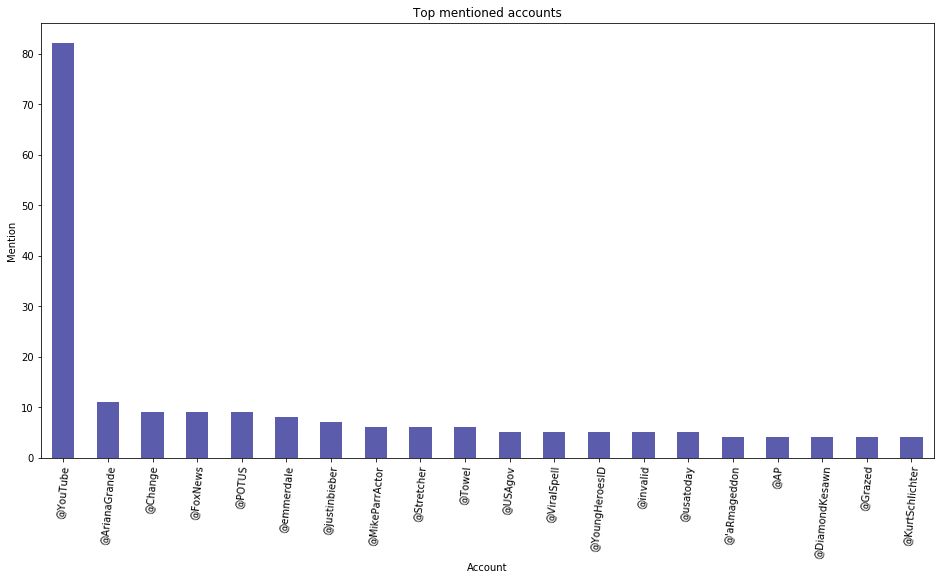

In [329]:
mentions_grouped.loc[:, 'total'].plot(kind='bar',  rot=85, title='Top mentioned accounts', color=(0.2, 0.2, 0.6, 0.8), figsize=(16, 8))
ax = plt.gca()
ax.set_ylabel('Mention')
ax.set_xlabel('Account')

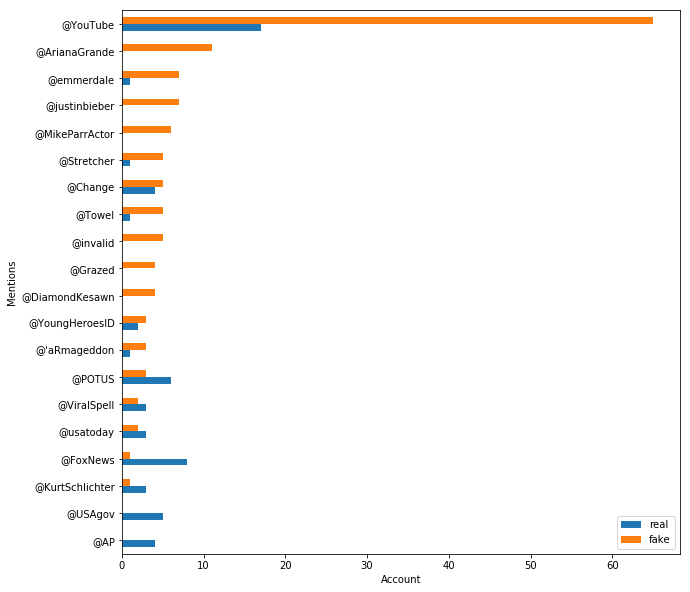

In [330]:
ax = mentions_grouped.sort_values(by=['fake']).loc[:, ['real', 'fake']].plot(kind='barh', figsize=(10, 10))
ax.set_ylabel('Mentions')
ax.set_xlabel('Account')

### Relacion real-falso con location, keyword vacías

In [331]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [345]:
no_location = tweets[tweets['location'].isnull()]
no_keyword = tweets[tweets['keyword'].isnull()]

In [346]:
no_location.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [347]:
no_keyword.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [348]:
no_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 7612
Data columns (total 5 columns):
id          2452 non-null int64
keyword     2396 non-null object
location    0 non-null object
text        2452 non-null object
target      2452 non-null int64
dtypes: int64(2), object(3)
memory usage: 114.9+ KB


In [349]:
no_keyword.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 7612
Data columns (total 5 columns):
id          56 non-null int64
keyword     0 non-null object
location    0 non-null object
text        56 non-null object
target      56 non-null int64
dtypes: int64(2), object(3)
memory usage: 2.6+ KB


In [338]:
no_location.loc[:, 'len'] = no_location['text'].str.len()

/Users/Matias/miniconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [339]:
no_keyword.loc[:, 'len'] = no_keyword['text'].str.len()

/Users/Matias/miniconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Matias/miniconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [340]:
no_location.head()

,id,keyword,location,text,target,len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [341]:
no_keyword.head()

,id,keyword,location,text,target,len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [350]:
no_location['target'].value_counts(normalize=True)

0    0.583197
1    0.416803
Name: target, dtype: float64

In [343]:
no_keyword['target'].value_counts()

1    37
0    19
Name: target, dtype: int64

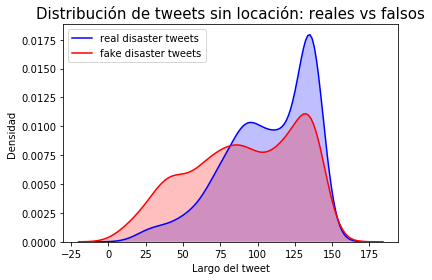

In [344]:
g = sns.kdeplot(no_location[no_location['target'] == 1]['len'], color='blue',\
                label='real disaster tweets', shade=True)
g = sns.kdeplot(no_location[no_location['target'] == 0]['len'], color='red',\
                label='fake disaster tweets', shade=True)

g.set_title('Distribución de tweets sin locación: reales vs falsos',\
            fontsize=15)
g.set_ylabel('Densidad')
g.set_xlabel('Largo del tweet')